<p style="font-size:40px;text-align:center;color:red;"> <b>!! PERSONALIZED CANCER DIAGNOSIS !!</b> </p>

<h1 style="font-size:30px;color:green">1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download <b>training_variants.zip</b> and <b>training_text.zip</b> from Kaggle.</p> 
<h4> Problem statement : </h4>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement<br>
1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25<br>
2. https://www.youtube.com/watch?v=UwbuW7oK8rk <br>
3. https://www.youtube.com/watch?v=qxXRKVompI8<br>

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.


<h1 style="font-size:30px;color:green">2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files have a <b>common column called ID</b>
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h4>training_variants</h4>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>


<h4> training_text</h4>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

#### MULTI-CLASS CLASSIFICATION
<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> <b>Objective:</b> Predict the probability of each data-point belonging to each of the nine classes.
</p><br>
<b> Constraints:
</b>

- Interpretability
- Class probabilities are needed.
- Penalize the errors in class probabilites => Metric is Log-loss.
- No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1 style="font-size:30px;color:green">3. Exploratory Data Analysis</h1>


In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore")


C:\Users\Arpit\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [2]:
data = pd.read_csv('training/training_variants')
print("SHAPE OF DATASET : ", data.shape)
print('Features : ', data.columns.values)
data.head()

SHAPE OF DATASET :  (3321, 4)
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [3]:
# note the seprator in this file
data_text = pd.read_csv('training/training_text', sep="\|\|", engine= "python", names=["ID","TEXT"], skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


<h3>3.1.3. Preprocessing of text</h3>
Several steps are involved in text preprocessing

- Stopword removal
- redundant symbol removal
- lowercase

In [4]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace special character with space
        total_text = re.sub('[^a-zA-Z0-9\n]', " ", total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data    
            if not word in stop_words:
                string += word+" "
        data_text[column][index] = string
        

In [5]:
#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("There is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

There is no text description for id: 1109
There is no text description for id: 1277
There is no text description for id: 1407
There is no text description for id: 1639
There is no text description for id: 2755
Time took for preprocessing the text : 31.6978902 seconds


In [6]:
#merging both gene_variations and text data based on ID
result = pd.merge(data,data_text, on="ID", how='left')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [7]:
result.shape

(3321, 5)

### Handling NaN values

In [8]:
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


### Replacing NaN text with new variable Gene+Variation

In [9]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene']+" "+result['Variation']

In [10]:
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [11]:
result[result['ID']==1109]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,FANCA S1088F


<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h3>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h3>
Random Splitting because we are not dealing with time series dataset.

In [12]:
y_true = result['Class'].values
# replacing more than 1 space with space
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

<h5 style="font-size:20px;color:brown">
Stratified Train-Test Splits
As such, it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset. This is called a stratified train-test split.</h5>

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [13]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


<h3>3.1.4.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h3>

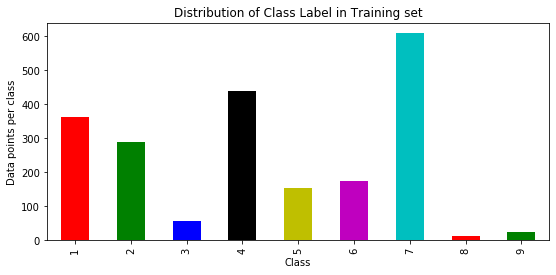

Number data points in class 7 : 609 ( 28.67 %)
Number data points in class 4 : 439 ( 20.67 %)
Number data points in class 1 : 363 ( 17.09 %)
Number data points in class 2 : 289 ( 13.61 %)
Number data points in class 6 : 176 ( 8.29 %)
Number data points in class 5 : 155 ( 7.3 %)
Number data points in class 3 : 57 ( 2.68 %)
Number data points in class 9 : 24 ( 1.13 %)
Number data points in class 8 : 12 ( 0.56 %)
--------------------------------------------------------------------------------


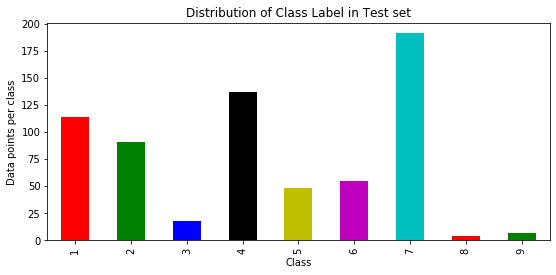

Number data points in class 7 : 191 ( 28.72 %)
Number data points in class 4 : 137 ( 20.6 %)
Number data points in class 1 : 114 ( 17.14 %)
Number data points in class 2 : 91 ( 13.68 %)
Number data points in class 6 : 55 ( 8.27 %)
Number data points in class 5 : 48 ( 7.22 %)
Number data points in class 3 : 18 ( 2.71 %)
Number data points in class 9 : 7 ( 1.05 %)
Number data points in class 8 : 4 ( 0.6 %)
--------------------------------------------------------------------------------


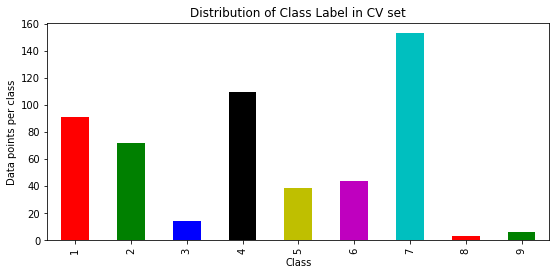

Number data points in class 7 : 153 ( 28.76 %)
Number data points in class 4 : 110 ( 20.68 %)
Number data points in class 1 : 91 ( 17.11 %)
Number data points in class 2 : 72 ( 13.53 %)
Number data points in class 6 : 44 ( 8.27 %)
Number data points in class 5 : 39 ( 7.33 %)
Number data points in class 3 : 14 ( 2.63 %)
Number data points in class 9 : 6 ( 1.13 %)
Number data points in class 8 : 3 ( 0.56 %)
--------------------------------------------------------------------------------


In [14]:
def utility_plot(dataset ,dataset_type, title):
    plt.figure(figsize=(9,4))
    dataset.plot(kind='bar',color=['R','G','B','k','y','m','c'])
    
    plt.xlabel("Class")
    plt.ylabel("Data points per class")
    plt.title('Distribution of Class Label in ' + title)
    plt.show()
    # -(train_class_distribution.values): the minus sign will give us in decreasing order
    sorted_yi = np.argsort(-dataset.values)
    for i in sorted_yi:
        print('Number data points in class',i+1,':',dataset.values[i],'(', np.round((dataset.values[i]/dataset_type.shape[0]*100),2),'%)')
    print('-'*80)
    
    
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sort_index()
test_class_distribution = test_df['Class'].value_counts().sort_index()
cv_class_distribution = cv_df['Class'].value_counts().sort_index()

utility_plot(train_class_distribution, train_df , "Training set")
utility_plot(test_class_distribution, test_df,"Test set")
utility_plot(cv_class_distribution, cv_df,"CV set")

<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [15]:
def generic_plot(C,x):
    labels = [1,2,3,4,5,6,7,8,9]
    plt.figure(figsize=(20,7))
    f = ".3f" if x!="cm" else 'd'
    sns.heatmap(C, annot=True, cmap="Greens", fmt=f, xticklabels=labels, yticklabels=labels)
    bottom, top = plt.ylim()  # return the current ylim
    plt.ylim(bottom+0.4, top-0.4)     # set the ylim to bottom, top
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
# This function plots the confusion matrices given y_true and y_pred.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divide each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing C in heatmap format
    print('\n')
    print("-"*50, "Confusion matrix", "-"*30)
    generic_plot(C,'cm')
    # representing B in heatmap format
    print("-"*50, "Precision matrix (Columm Sum=1)", "-"*30)
    generic_plot(B,'pr')
    # representing A in heatmap format
    print("-"*50, "Recall matrix (Row sum=1)", "-"*30)
    generic_plot(A,'rc')

In [16]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",round(log_loss(y_cv,cv_predicted_y, eps=1e-15),3))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",round(log_loss(y_test,test_predicted_y, eps=1e-15),3))

predicted_y =np.argmax(test_predicted_y, axis=1)


Log loss on Cross Validation Data using Random Model 2.502
Log loss on Test Data using Random Model 2.501




-------------------------------------------------- Confusion matrix ------------------------------


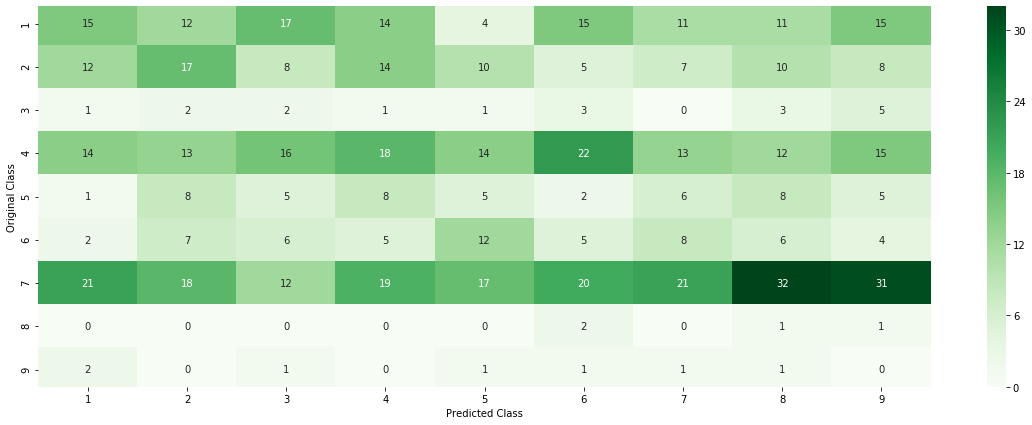

-------------------------------------------------- Precision matrix (Columm Sum=1) ------------------------------


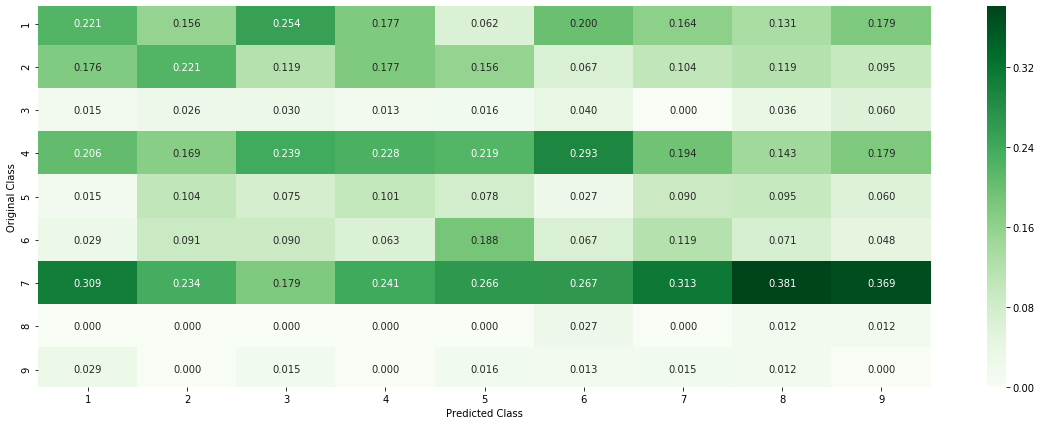

-------------------------------------------------- Recall matrix (Row sum=1) ------------------------------


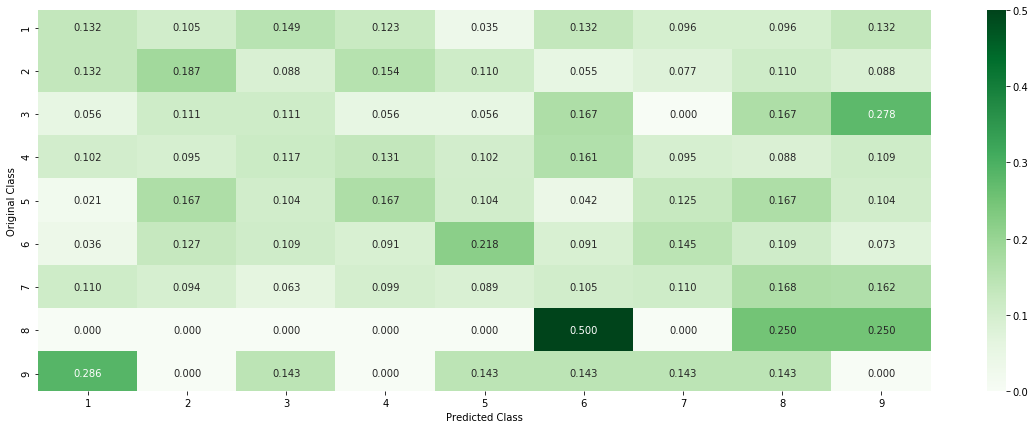

In [17]:
plot_confusion_matrix(y_test, predicted_y+1)

<h1 style="color:Red">3.3 Univariate Analysis</h1>

Can we get better accuracy using just one feature???

- <b>OneHotEncoding</b>: We use Bag of Words to represent each category (High dimensions) if a number of categories are k, it will return a k-dim vector. 1 feature converted into k features.
- <b>Response Coding</b>: We use the probability of each category to belongs to each class, each will return c-dim vector if we have the c-class classification, It doesn't depend on a number of categories. 1 feature will be converted into c-features.
<h3 style="color:Red">Response coding is performed only on training data , it is not performed on test or cv data.</h3>


In [18]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------


In [19]:

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            
            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
   
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

<h3>3.2.1 Univariate Analysis on Gene Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

In [20]:
unique_genes = train_df['Gene'].value_counts()
print("Number of unique Genes : ", unique_genes.shape[0])
print()
# the top 10 genes that occured most
unique_genes.head(10)

Number of unique Genes :  242



BRCA1     167
TP53      114
EGFR       93
PTEN       92
BRCA2      72
KIT        61
BRAF       56
PDGFRA     47
ERBB2      46
PIK3CA     41
Name: Gene, dtype: int64

In [21]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 242 different categories of genes in the train data, and they are distibuted as follows


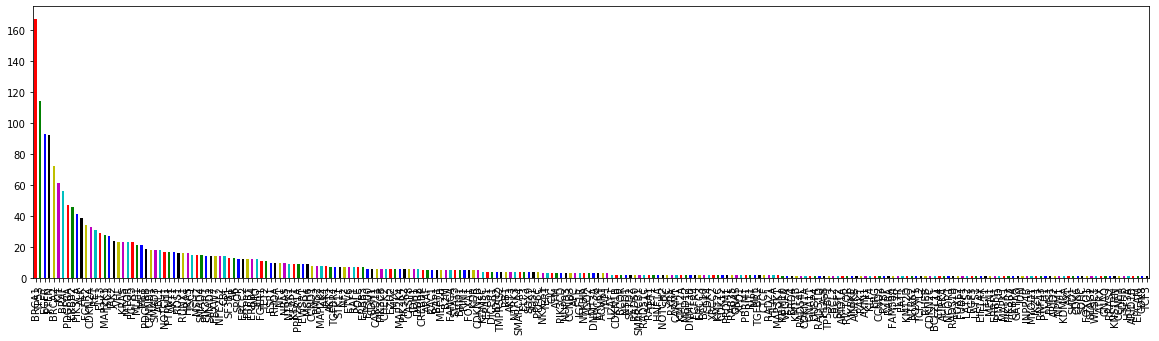

In [22]:
plt.figure(figsize=(20,5))
unique_genes.plot(kind='bar',color=['R','G','B','k','y','m','c'])

Most of the genes have occured only once or twice, very few genes have occured more than 25 times.

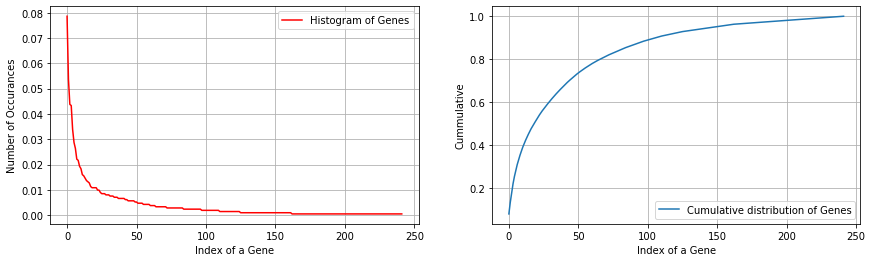

In [23]:
def generic_pdf_cdf(unique_genes):
    s = sum(unique_genes.values)
    h = unique_genes.values/s;
    plt.subplot(1,2,1)
    plt.plot(h,label="Histogram of Genes",color='red')
    plt.xlabel('Index of a Gene')
    plt.ylabel('Number of Occurances')
    plt.legend()
    plt.grid()

    plt.subplot(1,2,2)
    c = np.cumsum(h)
    plt.plot(c,label='Cumulative distribution of Genes')
    plt.xlabel('Index of a Gene')
    plt.ylabel('Cummulative')
    plt.grid()
    plt.legend()
    plt.subplots_adjust(right=2)
generic_pdf_cdf(unique_genes)

### Observation

- It's perito distribution(20-80).
- 50 genes contributed to more than 75% of the total data.
- Most of the genes have occured only once or twice, very few genes have occured more than 25 times.

<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable.
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [24]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [25]:
all_feat = [train_gene_feature_responseCoding,test_gene_feature_responseCoding,cv_gene_feature_responseCoding]
names = ['train_gene_feature_responseCoding','test_gene_feature_responseCoding','cv_gene_feature_responseCoding']
for x in range(3):
    print("Size of the ",names[x]," : ", all_feat[x].shape)

Size of the  train_gene_feature_responseCoding  :  (2124, 9)
Size of the  test_gene_feature_responseCoding  :  (665, 9)
Size of the  cv_gene_feature_responseCoding  :  (532, 9)


In [26]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:",
      train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2124, 9)


In [28]:
# one-hot encoding of Gene feature.
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [29]:
train_df['Gene'].head()

3064      MED12
857        ABL1
597       SMAD4
303     TMPRSS2
791       ERBB4
Name: Gene, dtype: object

In [30]:
print(gene_vectorizer.get_feature_names())
print(len(gene_vectorizer.get_feature_names()))

['abl1', 'acvr1', 'ago2', 'akt1', 'akt2', 'akt3', 'alk', 'apc', 'ar', 'araf', 'arid1a', 'arid1b', 'arid2', 'atm', 'atrx', 'aurka', 'aurkb', 'axin1', 'axl', 'b2m', 'bap1', 'bcl10', 'bcl2', 'bcl2l11', 'bcor', 'braf', 'brca1', 'brca2', 'brd4', 'brip1', 'card11', 'carm1', 'casp8', 'cbl', 'ccnd1', 'ccnd2', 'ccnd3', 'ccne1', 'cdh1', 'cdk12', 'cdk4', 'cdk6', 'cdk8', 'cdkn1a', 'cdkn1b', 'cdkn2a', 'cdkn2b', 'cdkn2c', 'cebpa', 'chek2', 'cic', 'crebbp', 'ctcf', 'ctla4', 'ctnnb1', 'ddr2', 'dicer1', 'dnmt3a', 'dnmt3b', 'dusp4', 'egfr', 'eif1ax', 'elf3', 'ep300', 'epas1', 'epcam', 'erbb2', 'erbb3', 'erbb4', 'ercc2', 'ercc3', 'ercc4', 'erg', 'errfi1', 'esr1', 'etv6', 'ewsr1', 'ezh2', 'fam58a', 'fanca', 'fat1', 'fbxw7', 'fgf3', 'fgfr1', 'fgfr2', 'fgfr3', 'fgfr4', 'flt1', 'flt3', 'foxa1', 'foxl2', 'foxo1', 'foxp1', 'fubp1', 'gata3', 'gna11', 'gnaq', 'gnas', 'h3f3a', 'hla', 'hnf1a', 'hras', 'idh1', 'idh2', 'igf1r', 'ikbke', 'ikzf1', 'il7r', 'inpp4b', 'jak1', 'jak2', 'jun', 'kdm5c', 'kdm6a', 'kdr', 'keap

In [31]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method.\nThe shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method.
The shape of gene feature: (2124, 241)


<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

In [32]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)
def generic_univariate_ml_model(X_train,y_train,cv_gene_feature_onehotCoding,test_gene_feature_onehotCoding):
    alpha = [10**x for x in range(-5,1)]
    cv_log_loss_error = []
    
    for i in alpha:
        clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
        clf.fit(X_train,y_train)
        sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
        sig_clf.fit(X_train,y_train)
        predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
        cv_log_loss_error.append([log_loss(y_cv,predict_y, labels=clf.classes_, eps=1e-15)])
        print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    
    fig, ax = plt.subplots()
    ax.plot(alpha,cv_log_loss_error,c='g')
    
    for i, txt in enumerate(np.round(cv_log_loss_error,3)):
        ax.annotate((alpha[i],np.round(txt[0],3)), (alpha[i],cv_log_loss_error[i][0]))
    plt.grid()
    plt.title("Cross Validation error for each alpha")
    plt.xlabel("Alpha i's")
    plt.ylabel("Error measure")
    plt.show()
    
    # Making final model with best parameter
    best_alpha = np.argmin(cv_log_loss_error)
    clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
    clf.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(clf,method='sigmoid')
    sig_clf.fit(X_train,y_train)
        
    # Prediction 
    predict_y = sig_clf.predict_proba(X_train)
    print('FOR value of best alpha = ', alpha[best_alpha], "The train log loss is: ",log_loss(y_train,predict_y,labels=clf.classes_,eps=1e-15))
    predict_cv = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_cv, labels=clf.classes_, eps=1e-15))
    predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
    print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


### Predictig using only gene feature

For values of alpha =  1e-05 The log loss is: 1.2100219088519202
For values of alpha =  0.0001 The log loss is: 1.1890168621469164
For values of alpha =  0.001 The log loss is: 1.225513741794591
For values of alpha =  0.01 The log loss is: 1.3445075124248393
For values of alpha =  0.1 The log loss is: 1.4498810089640863
For values of alpha =  1 The log loss is: 1.4837501601761762


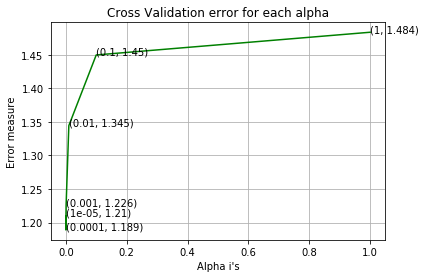

FOR value of best alpha =  0.0001 The train log loss is:  0.9889816238637666
For values of best alpha =  0.0001 The cross validation log loss is: 1.1890168621469164
For values of best alpha =  0.0001 The test log loss is: 1.1730511016503038


In [33]:
generic_univariate_ml_model(train_gene_feature_onehotCoding, y_train, cv_gene_feature_onehotCoding,test_gene_feature_onehotCoding)

<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [34]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage = test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage = cv_df[cv_df['Gene'].isin(list(set(train_df["Gene"])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",round((test_coverage/test_df.shape[0])*100,2),'%')
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,round((cv_coverage/cv_df.shape[0])*100,2),'%')

Q6. How many data points in Test and CV datasets are covered by the  242  genes in train dataset?
Ans
1. In test data 647 out of 665 : 97.29 %
2. In cross validation data 520 out of  532 : 97.74 %


<h3>3.2.2 Univariate Analysis on Variation Feature</h3>

<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there?</p>

In [35]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1914
Truncating_Mutations    66
Amplification           46
Deletion                44
Fusions                 27
Overexpression           5
G12V                     4
T58I                     3
Q61L                     3
Q61H                     3
Q61R                     3
Name: Variation, dtype: int64


In [36]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 1914 different categories of variations in the train data, and they are distibuted as follows


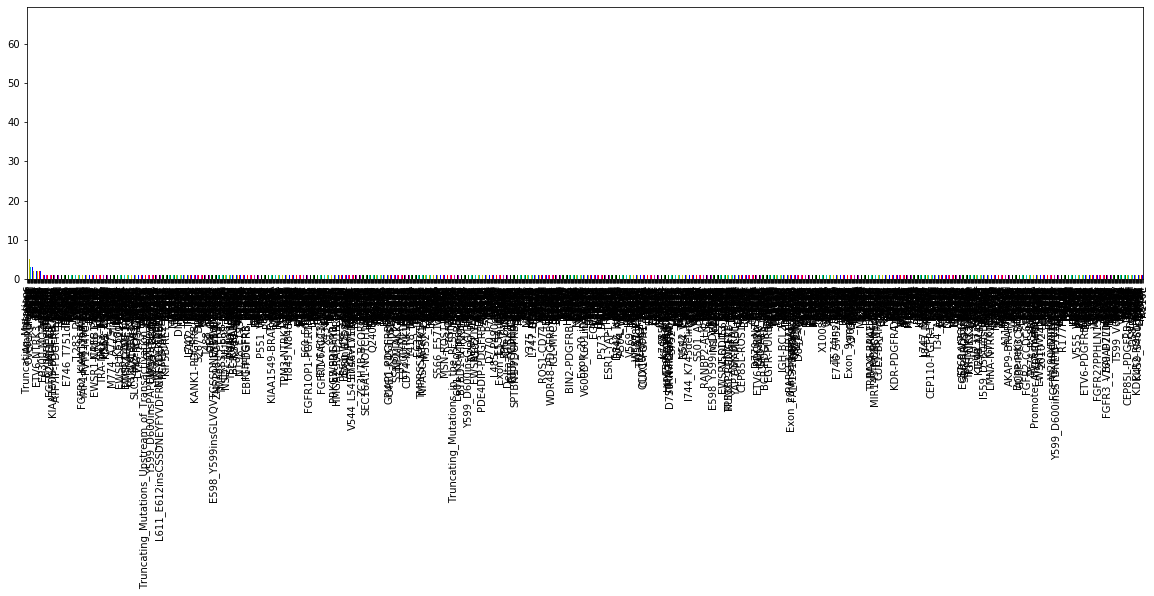

In [37]:
plt.figure(figsize=(20,5))
unique_variations.plot(kind='bar',color=['R','G','B','k','y','m','c'])

Most of the features have occcured only once.

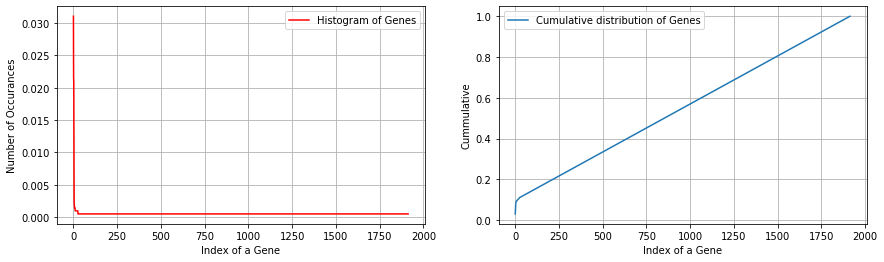

In [38]:
# plotting pdf and cdf
generic_pdf_cdf(unique_variations)

### Observation:

- Highly sckewed
- most of the the catagory occured only once

In [39]:
unique_variations.value_counts()

1     1888
2       16
3        4
66       1
46       1
44       1
27       1
5        1
4        1
Name: Variation, dtype: int64

<p style="font-size:18px;"> <b>Q9.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [40]:
# alpha is used for laplace smoothing
alpha = 1
# train variation feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test variation feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation variation feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [41]:
all_feat = [train_variation_feature_responseCoding,test_variation_feature_responseCoding,cv_variation_feature_responseCoding]
names = ['train_gene_feature_responseCoding','test_gene_feature_responseCoding','cv_gene_feature_responseCoding']
for x in range(3):
    print("Size of the ",names[x]," : ", all_feat[x].shape)


Size of the  train_gene_feature_responseCoding  :  (2124, 9)
Size of the  test_gene_feature_responseCoding  :  (665, 9)
Size of the  cv_gene_feature_responseCoding  :  (532, 9)


In [42]:
print("train__feature_responseCoding is converted feature using respone coding method. The shape of gene feature:",
      train_variation_feature_responseCoding.shape)

train__feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2124, 9)


In [43]:
# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [44]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:",
      train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1949)


<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

Using generic model check feature imporance


For values of alpha =  1e-05 The log loss is: 1.725554743976955
For values of alpha =  0.0001 The log loss is: 1.7198794691469068
For values of alpha =  0.001 The log loss is: 1.7187578585037162
For values of alpha =  0.01 The log loss is: 1.7231554700929537
For values of alpha =  0.1 The log loss is: 1.7314368283042423
For values of alpha =  1 The log loss is: 1.7333257742149903


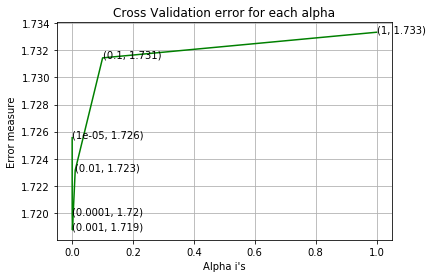

FOR value of best alpha =  0.001 The train log loss is:  1.07642635711872
For values of best alpha =  0.001 The cross validation log loss is: 1.7187578585037162
For values of best alpha =  0.001 The test log loss is: 1.732551087593318


In [45]:
generic_univariate_ml_model(train_variation_feature_onehotCoding, y_train,cv_variation_feature_onehotCoding,test_variation_feature_onehotCoding)

<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [46]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  1914  genes in test and cross validation data sets?
Ans
1. In test data 61 out of 665 : 9.172932330827068
2. In cross validation data 50 out of  532 : 9.398496240601503


<h3>3.2.3 Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [47]:
# cls_text is a data frame
# for every row in data frame consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [48]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding 

In [49]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 52975


In [50]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [51]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [52]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [53]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [54]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [55]:
# Number of words for a given frequency.
print(Counter(sorted_text_occur))

Counter({3: 5174, 4: 3643, 5: 2851, 6: 2647, 7: 2196, 8: 2133, 9: 1761, 10: 1257, 12: 1239, 11: 1124, 14: 1113, 16: 959, 13: 923, 15: 773, 17: 728, 18: 689, 20: 630, 21: 478, 22: 477, 19: 463, 24: 439, 25: 400, 35: 391, 23: 382, 28: 376, 29: 361, 26: 357, 27: 356, 30: 329, 31: 306, 33: 305, 32: 296, 54: 272, 34: 267, 36: 255, 39: 218, 40: 212, 38: 204, 37: 200, 48: 184, 42: 182, 44: 171, 45: 170, 46: 166, 41: 163, 47: 161, 55: 159, 43: 159, 50: 157, 60: 155, 56: 153, 51: 150, 57: 143, 63: 141, 52: 141, 53: 140, 49: 139, 61: 125, 58: 121, 64: 117, 59: 117, 66: 109, 62: 109, 70: 108, 65: 108, 72: 102, 68: 102, 67: 98, 88: 93, 81: 92, 78: 92, 75: 89, 73: 83, 71: 82, 69: 82, 77: 80, 84: 78, 76: 77, 83: 71, 91: 69, 92: 68, 90: 67, 99: 65, 80: 65, 82: 64, 74: 64, 94: 63, 87: 62, 100: 60, 96: 60, 89: 60, 86: 60, 79: 60, 98: 58, 85: 58, 112: 57, 97: 56, 111: 55, 108: 55, 93: 55, 104: 54, 95: 54, 120: 52, 105: 51, 102: 51, 115: 50, 138: 49, 117: 49, 110: 49, 128: 48, 116: 48, 109: 48, 107: 48, 

For values of alpha =  1e-05 The log loss is: 1.310316436262344
For values of alpha =  0.0001 The log loss is: 1.1890595784006663
For values of alpha =  0.001 The log loss is: 1.183971318818925
For values of alpha =  0.01 The log loss is: 1.2982989208890618
For values of alpha =  0.1 The log loss is: 1.4608591444456787
For values of alpha =  1 The log loss is: 1.656176141731173


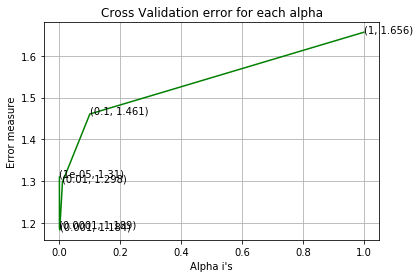

FOR value of best alpha =  0.001 The train log loss is:  0.6683852553225702
For values of best alpha =  0.001 The cross validation log loss is: 1.183971318818925
For values of best alpha =  0.001 The test log loss is: 1.1277438030797695


In [56]:
generic_univariate_ml_model(train_text_feature_onehotCoding, y_train,cv_text_feature_onehotCoding
                            ,test_text_feature_onehotCoding)

<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [57]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [58]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

96.543 % of word of test data appeared in train data
96.739 % of word of Cross Validation appeared in train data


<h1>4. Machine Learning Models</h1>

In [59]:
#Data preparation for ML models.

#Misc. functions for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [60]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [61]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<p style="font-size:24px;text-align:Center"> <b>Stacking the three types of features </b><p>

In [62]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))


In [63]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 55165)
(number of data points * number of features) in test data =  (665, 55165)
(number of data points * number of features) in cross validation data = (532, 55165)


In [64]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2124, 27)
(number of data points * number of features) in test data =  (665, 27)
(number of data points * number of features) in cross validation data = (532, 27)


<h2>4.1. Base Line Model</h2>